<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-success" style="font-size:20px; border:1px solid black; padding:10px">
<center><h1>Post Goals:</h1></center>
    <hr style="border-top: 2px dashed black;">
    <ol>
        <li><a href="#objective1">Introduction to nonparametric procedures on two population.</a></li><br>
        <li><a href="#objective2">Sign Test</a></li><br>
        <li><a href="#objective3">Wilcoxon Signed Rank Test</a></li><br>
        <li><a href="#objective4">Wilcoxon-Mann-Whitney Rank Sum Test</a></li><br>        
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Introduction to nonparametric procedures on two population.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The basics</u></strong>
        <li>Not all inference tests that compare two samples have populations drawn from normal distributions.</li><br>
        <li>In this post I will dive into a few nonparametric procedures that can be used when data is not normally distributed.</li><br>
        <li>The sign test (median test) allows us to perform a hypothesis test on a population median, and consider the number of events that fall below and above.  We use this test in lieu of the t-test for a single population mean.</li><br>
        <li>The sign test can be used when the assumptions of normality fail a paired t-test, since the paired test is a hypothesis test on a single sample (the differences) between the two sample populations.</li><br>
        <li>Another more powerful test is the Wilcoxon signed rank test and can be used for making inferences on a single population median, or in a paired/dependent sampling scheme.</li><br>
        <li>The final test that will be discussed here is the Mann-Whitney U-test, which is the analogue of the two-sample t-test, although this test finds the difference in the median between two populations that are sampled independently from each other.</li><br>
        <li>The Mann-Whitney U-test is also called the Wilcoxon rank sum test and the  Wilcoxon-Mann-Whitney test. </li><br>        
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Sign Test</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics</u></strong>
        <li>Use this test if you are interested in deciding if the median of the population is different in a paired sampling scheme is 0 or not.</li><br>
        <li>
            <ul>Assumptions:
                <li>The difference comes from a random sample.</li><br>
                <li>The difference is continous</li><br>
            </ul>                
        </li><br>
        <li>
            <ul>Hypothesis test:<br>
                <li>Null Hypothesis. $H_o: \tilde{\mu_{D}} = 0 $</li><br>
                <li>Alternative Hypothesis 2 sided: $H_a: \tilde{\mu_D} \neq 0 $</li><br>
                <li>Alternative Hypothesis 1 sided lower tail: $H_a: \tilde{\mu_D} < 0 $</li><br>
                <li>Alternative Hypothesis 1 sided upper tail: $H_a: \tilde{\mu_D} > 0 $</li><br>
            </ul>                
        </li><br>  
        <li>R method: <code>binom.test(x, n, p=P0, alt=TYPE, conf.level=CL)</code></li><br>
    </ul>
</div>

# Example 1: cholesterol levels using Sign Test

 - Is the median after treatment 0

In [1]:
cholesterol <- read.csv('data/cholesterol.paired.csv')
attach(cholesterol)
cholesterol

subj,before,after
<int>,<int>,<int>
1,265,258
2,240,234
3,258,245
4,295,286
5,251,239
6,245,235
7,287,280
8,314,301
9,260,248


## Calculations

In [2]:
diff <- before - after
sum(diff > 0)
binom.test(x=15, n=15, alt='g')

[1] 15


	Exact binomial test

data:  15 and 15
number of successes = 15, number of trials = 15, p-value = 3.052e-05
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.8189637 1.0000000
sample estimates:
probability of success 
                     1 


## Example 1 Result<br>  <font color="red"> Reject $H_0$</font> <br>The p value is less than the alpha level, the result suggest the differences are positive, cholesterol is down due to intervention

<hr style="border-top: 5px solid black;">

<div id="objective3" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Wilcoxon Signed Rank Test</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics</u></strong>
        <li>Use the Wilcoxon Signed Rank Test on a paired sampling scheme or a single sample, but its similar to a paired t-test for data that is not normally distributed.</li><br>
        <li>The Wilcoxon signed rank test is a test for the population median, with the assumption that the differences have a symmetric distribution.</li>
        <li>
            <ul>Assumptions:
                <li>The differences comes from a random sample.</li><br>
                <li>The differences is either numeric or ordinal</li><br>
                <li>The differences is symmetric</li><br>                
            </ul>                
        </li><br>
        <li>
            <ul>Hypothesis test:<br>
                <li>Null Hypothesis. $H_o: \tilde{\mu_{D}} = 0 $</li><br>
                <li>Alternative Hypothesis 2 sided: $H_a: \tilde{\mu_D} \neq 0 $</li><br>
                <li>Alternative Hypothesis 1 sided lower tail: $H_a: \tilde{\mu_D} < 0 $</li><br>
                <li>Alternative Hypothesis 1 sided upper tail: $H_a: \tilde{\mu_D} > 0 $</li><br>
            </ul>                
        </li><br>  
        <li>R method: <code>wilcox.test(before, after, paired=TRUE, alt=TYPE, conf.level=CL)</code></li><br>
    </ul>
</div>

# Example 2: cholesterol levels using the Wilcox test

 - Check if the difference between the paired sample is symmetric
 - If yes, perform the test

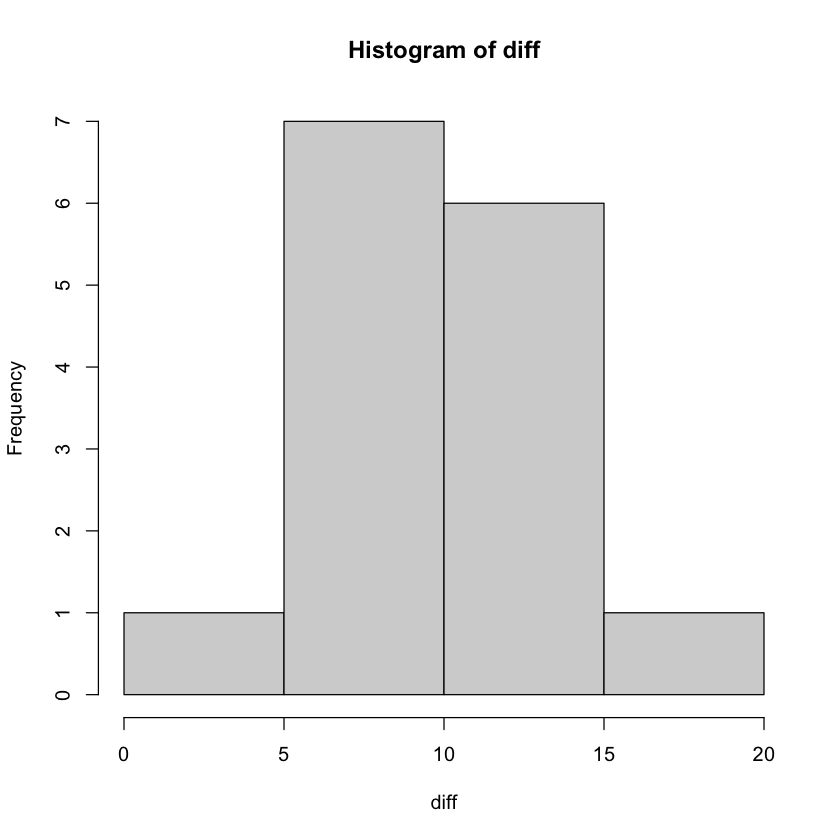

In [3]:
# Check if difference is symmetric
hist(diff)

In [4]:
wilcox.test(cholesterol$before,cholesterol$after,paired=TRUE,alt='g')

Warning message in wilcox.test.default(cholesterol$before, cholesterol$after, paired = TRUE, :
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  cholesterol$before and cholesterol$after
V = 120, p-value = 0.0003561
alternative hypothesis: true location shift is greater than 0


## Example 2 Result<br>  <font color="red"> Reject $H_0$</font> <br>The p value is less than the alpha level, the result suggest the differences are positive, cholesterol is down due to intervention

<hr style="border-top: 5px solid black;">

<div id="objective4" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Wilcoxon-Mann-Whitney Rank Sum Test</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics</u></strong>
        <li>Use this test when you have two independent samples whose data is not normally distributed.</li><br>
        <li>The Wilcoxon signed rank test is a test for the population median, with the assumption that the differences have a symmetric distribution.</li>
        <li>
            <ul>Assumptions:
                <li>Random sample with same variable from populations</li><br>
                <li>The samples are independent form one another.</li><br>
                <li>The data is either numeric or ordinal</li><br>
                <li>The two populations curves have the same "shape".</li><br>                
            </ul>                
        </li><br>
        <li>
            <ul>Hypothesis test:<br>
                <li>Null Hypothesis. $H_o: \tilde{\mu_1} = \tilde{\mu_2} $</li><br>
                <li>Alternative Hypothesis 2 sided: $H_a: \tilde{\mu_1} \neq \tilde{\mu_2} $</li><br>
                <li>Alternative Hypothesis 1 sided lower tail: $H_a: \tilde{\mu_1} < \tilde{\mu_2} $</li><br>
                <li>Alternative Hypothesis 1 sided upper tail: $H_a: \tilde{\mu_1} > \tilde{\mu_2} $</li><br>
            </ul>                
        </li><br>  
        <li>R method: <code>wilcox.test(chol~group, alt='g')</code></li><br>
    </ul>
</div>

# Example 3: cholesterol levels using the Wilcoxon-Mann-Whitney Rank Sum Test

 - This is a test that has two independent samples that either received treatment or did not
 - Need to check that the two samples have the same "shape", will use a boxplot

In [5]:
# Load Data
cholesterol_exp2 <- read.csv('data/cholesterol.csv')

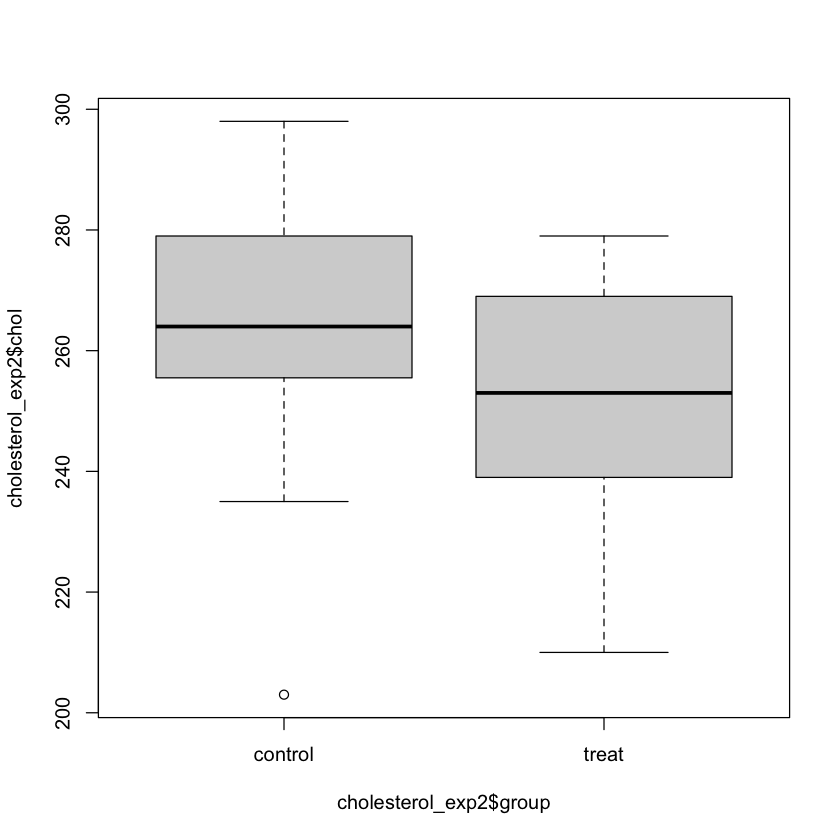

In [6]:
# Box plot
boxplot(cholesterol_exp2$chol~cholesterol_exp2$group)

In [7]:
# peform test
wilcox.test(cholesterol_exp2$chol~cholesterol_exp2$group, alt='g')

Warning message in wilcox.test.default(x = c(298L, 279L, 256L, 242L, 289L, 264L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  cholesterol_exp2$chol by cholesterol_exp2$group
W = 148, p-value = 0.073
alternative hypothesis: true location shift is greater than 0


## Example 3 Result<br>  <font color="red"> Accept $H_0$</font> <br>The p value is greater than the alpha level, the result suggest the two groups are not different.

<hr style="border-top: 5px solid black;">